In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import binned_statistic
from gtex import *

In [2]:
working_dir = "/Users/filippo/Developer/tesi/gtex/"
os.chdir(working_dir)

In [3]:
normalisation_str='counts'

In [4]:
df_genes = pd.read_csv("../genes.txt", index_col=[0])
genes = df_genes[df_genes['type_of_gene'].isin(['intergenic', 'protein-coding', 'ncRNA', 'snRNA',
       'pseudo', 'antisense', 'microRNA', 'snoRNA', 'rRNA', 'scRNA'])].index.values
df_genes['type_of_gene'].unique()

array(['intergenic', 'unknown', 'protein-coding', 'ncRNA', 'snRNA',
       'pseudo', 'antisense', 'microRNA', 'snoRNA', 'rRNA', 'scRNA'],
      dtype=object)

In [5]:
# GTEX
common_tissues = ['Blood','Heart', 'Muscle', 'Brain', 'Skin', 'Adipose Tissue', 'Nerve', 'Thyroid', 'Testis']
more_common_tissues = np.unique(samples['primary_site'])

In [6]:
samples = pd.read_csv("files.dat", index_col=[0])
samples.head()

,primary_site,secondary_site
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,Adipose - Subcutaneous
GTEX-111CU-1826-SM-5GZYN,Adipose Tissue,Adipose - Subcutaneous
GTEX-111FC-0226-SM-5N9B8,Adipose Tissue,Adipose - Subcutaneous
GTEX-111VG-2326-SM-5N9BK,Adipose Tissue,Adipose - Subcutaneous
GTEX-111YS-2426-SM-5GZZQ,Adipose Tissue,Adipose - Subcutaneous


In [7]:
primaries = samples['primary_site'].unique()

In [8]:
np.sort(primaries)

array(['Adipose Tissue', 'Adrenal Gland', 'Bladder', 'Blood',
       'Blood Vessel', 'Brain', 'Breast', 'Cervix Uteri', 'Colon',
       'Esophagus', 'Fallopian Tube', 'Heart', 'Kidney', 'Liver', 'Lung',
       'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate',
       'Salivary Gland', 'Skin', 'Small Intestine', 'Spleen', 'Stomach',
       'Testis', 'Thyroid', 'Uterus', 'Vagina'], dtype=object)

In [9]:
np.sort(np.unique(samples['secondary_site']))

array(['Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)',
       'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary',
       'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex',
       'Brain - Frontal Cortex (BA9)', 'Brain - Hippocampus',
       'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)',
       'Brain - Spinal cord (cervical c-1)', 'Brain - Substantia nigra',
       'Breast - Mammary Tissue', 'Cells - EBV-transformed lymphocytes',
       'Cells - Transformed fibroblasts', 'Cervix - Ectocervix',
       'Cervix - Endocervix', 'Colon - Sigmoid', 'Colon - Transverse',
       'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa',
       'Esophagus - Muscularis', 'Fallopian Tube',
       'Heart - Atrial Appendage', 'Heart - Left Ven

In [15]:
# GTex
df = pd.read_csv("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct", index_col=[0], sep='\t')
df.drop('Description', axis=1, inplace=True)
df.index=[g[:15] for g in df.index.values]
df.fillna(value=0., inplace=True)
df.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
ENSG00000223972,0.056945,0.05054,0.07460,0.03976,0.04386,0.04977,0.05878,0.089315,0.07901,0.075870,...,0.05417,0.05982,0.06089,0.070250,0.063895,1.76000,0.058350,0.03849,0.03386,0.11750
ENSG00000227232,11.850000,9.75300,8.02300,12.51000,12.30000,11.59000,14.24000,5.743000,6.81200,6.678500,...,17.15000,17.74000,12.19000,18.130000,9.342500,17.14000,19.255000,21.81000,17.28000,8.43900
ENSG00000243485,0.061460,0.05959,0.08179,0.04297,0.05848,0.05184,0.06097,0.115450,0.10860,0.087855,...,0.06487,0.06389,0.05562,0.049525,0.078575,0.07375,0.066845,0.00000,0.04732,0.00000
ENSG00000237613,0.038600,0.03245,0.04050,0.02815,0.03678,0.03894,0.04113,0.056265,0.05148,0.052990,...,0.03615,0.04080,0.03527,0.032320,0.043800,0.03714,0.038565,0.00000,0.00000,0.02574
ENSG00000268020,0.035695,0.00000,0.03479,0.00000,0.00000,0.00000,0.00000,0.050520,0.04744,0.039240,...,0.03034,0.03705,0.03375,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000


In [17]:
#df.loc[:,'Description'].to_csv('gene_symbol.txt', index=True)

In [18]:
df = df.loc[df_genes[df_genes['type_of_gene']=='protein-coding'].index.values,:]

/Users/filippo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## Tissue U

In [57]:
O = df.dropna().apply(lambda x: len(x[x!=0])/float(len(x)),axis=1)

/Users/filippo/anaconda3/envs/thesis/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/filippo/anaconda3/envs/thesis/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


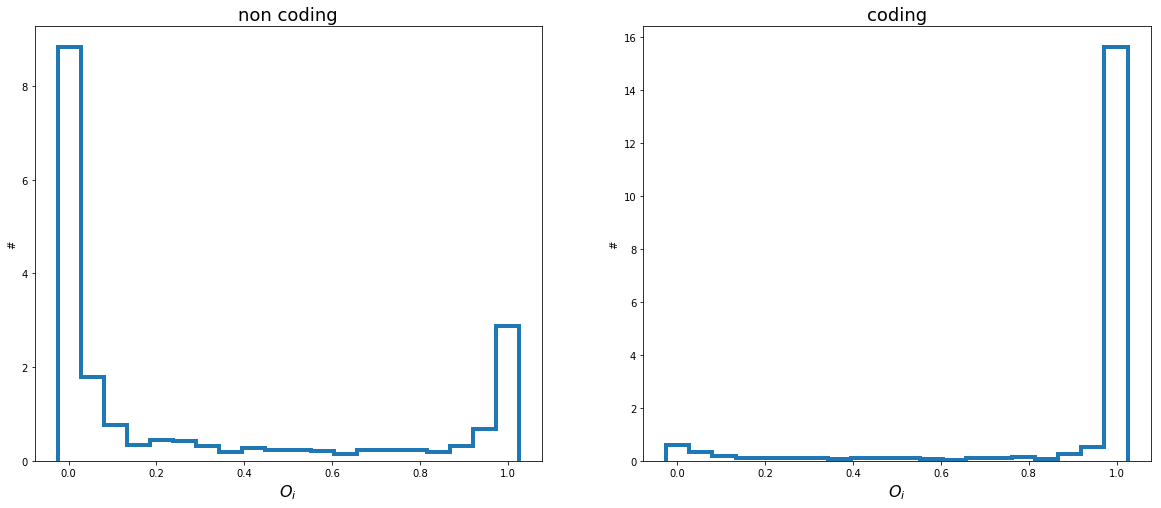

In [62]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,2)
bins = 20
rang = (0-0.5/20,1+0.5/20)
ax[0].hist(np.array(O.loc[df_genes[df_genes['type_of_gene']!='protein-coding'].index.values].dropna().values,dtype=float), histtype='step', lw=4, density=True, bins=bins, range=rang)
ax[0].set_title("non coding", fontsize=18)
ax[0].set_xlabel('$O_i$', fontsize=16)
ax[0].set_ylabel('#')
ax[1].hist(np.array(O.loc[df_genes[df_genes['type_of_gene']=='protein-coding'].index.values].dropna().values,dtype=float), histtype='step', lw=4, density=True, bins=bins, range=rang)
ax[1].set_title("coding", fontsize=18)
ax[1].set_xlabel('$O_i$', fontsize=16)
ax[1].set_ylabel('#')
plt.show()
fig.savefig("U_tissue.pdf")

## average tissues

In [19]:
df_tissue = pd.DataFrame(index=df.index)
for tissue in primaries:
    print(tissue)
    #GTEX TPM
    df_tissue.insert(0,tissue,df.loc[:,get_specific_mapping_to(tissue)].dropna().mean(axis=1))
    #GTex counts 
    #df_tissue.insert(0,tissue,df.loc[:,samples[samples['primary_site']==tissue].index.values].dropna().mean(axis=1))
    #df_tissue.insert(0,tissue,df.loc[:,tissue].dropna())
df_tissue.head()

Adipose Tissue
Adrenal Gland
Blood Vessel
Bladder
Brain
Breast
Blood
Skin
Cervix Uteri
Colon
Esophagus
Fallopian Tube
Heart
Kidney
Liver
Lung
Salivary Gland
Muscle
Nerve
Ovary
Pancreas
Pituitary
Prostate
Small Intestine
Spleen
Stomach
Testis
Thyroid
Uterus
Vagina


,Vagina,Uterus,Thyroid,Testis,Stomach,Spleen,Small Intestine,Prostate,Pituitary,Pancreas,...,Colon,Cervix Uteri,Skin,Blood,Breast,Brain,Bladder,Blood Vessel,Adrenal Gland,Adipose Tissue
ENSG00000167578,39.7700,40.22000,56.39500,42.23,28.61500,80.36000,40.3800,45.220000,75.3900,10.45500,...,32.17000,48.132500,25.246667,63.817500,37.3650,62.047308,39.84000,45.053333,55.9250,35.327500
ENSG00000078237,7.6230,8.21300,8.89800,15.56,7.37400,17.61500,9.5710,9.774500,17.6600,2.28250,...,9.99500,6.782500,14.640000,20.257000,8.7170,6.046500,13.71000,10.303333,12.7000,10.492500
ENSG00000146083,34.1400,36.70000,49.59000,52.72,23.46500,84.29500,35.1500,31.450000,27.1000,11.81000,...,30.99250,30.660000,32.436667,40.007500,30.0400,24.798846,32.61000,20.333333,22.8550,24.585000
ENSG00000158486,0.2453,0.02784,0.02351,11.60,0.02112,0.04556,0.2619,0.048795,0.1848,0.04363,...,0.18302,0.101627,0.324920,0.023206,0.0265,0.036833,0.09791,0.024593,0.0155,0.023383
ENSG00000198242,405.6000,430.60000,287.55000,122.30,211.55000,353.40000,243.3000,295.050000,264.8000,150.50000,...,269.65000,479.025000,451.300000,509.375000,344.6000,120.836154,363.50000,354.500000,187.4500,304.550000


## integral

In [20]:
def get_integral_tissue(tissue):
    x = np.sort(df_tissue.loc[genes,tissue].fillna(0).values)[::-1]
    norm = np.sum(x)
    return np.cumsum(x/float(norm))

Blood
Heart
Muscle
Brain
Skin
Adipose Tissue
Nerve


/Users/filippo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


Thyroid
Testis


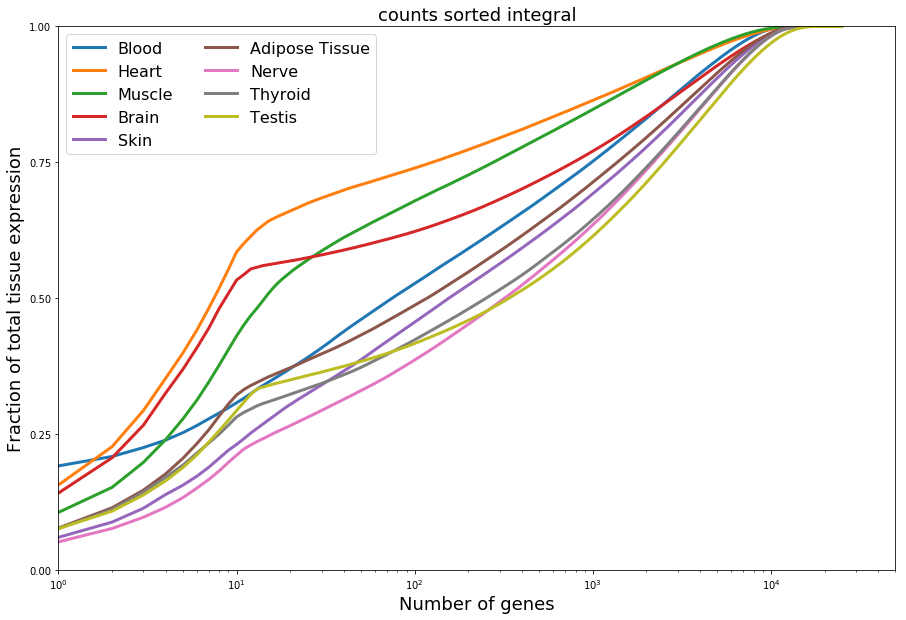

In [21]:
fig=plt.figure(figsize=(15,10))
ax=fig.subplots()
ax.set_title('%s sorted integral'%normalisation_str, fontsize=18)
for tissue in common_tissues:
#for tissue in more_common_tissues:
#for tissue in primaries:
        print(tissue)
        ax.plot(get_integral_tissue(tissue),label=tissue, lw=3)

#blood = df.loc[:,samples[samples['secondary_site']=='Whole Blood'].index.values].values
#ax.plot(np.cumsum(np.sort(blood)[::-1])/np.sum(blood), label='Whole Blood', lw=2)

ax.set_xscale('log')
ax.set_xlabel('Number of genes', fontsize=18)
ax.set_ylabel('Fraction of total tissue expression', fontsize=18)
ax.set_xlim((1,5e4))
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_ylim(0,1)
plt.legend(ncol=2, fontsize=16)
plt.show()
fig.savefig("fraction_of_trascriptome.pdf")

In [22]:
df.columns

Index(['Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)',
       'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary',
       'Artery - Tibial', 'Bladder', 'Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra', 'Breast - Mammary Tissue',
       'Cells - EBV-transformed lymphocytes',
       'Cells - Transformed fibroblasts', 'Cervix - Ectocervix',
       'Cervix - Endocervix', 'Colon - Sigmoid', 'Colon - Transverse',
       'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa',
       'Esophagus - Muscularis', 'Fallopian Tube', 'Heart - Atrial Appendage',
       'Heart - Left Ventricle'

In [25]:
for ensg in df['Whole Blood'].sort_values(ascending=False)[:10].index.values:
    print(ensg)

ENSG00000244734
ENSG00000188536
ENSG00000163220
ENSG00000223609
ENSG00000206172
ENSG00000087086
ENSG00000234745
ENSG00000185201
ENSG00000198712
ENSG00000204525


In [35]:
print(df_tissue['Brain'].sort_values(ascending=False)[:15])
x = df_tissue['Brain'].sort_values(ascending=False)
for g in df_tissue['Brain'].sort_values(ascending=False).index.values[:10]:
    print(g)

ENSG00000198712    63155.384615
ENSG00000198899    56458.076923
ENSG00000198938    54821.538462
ENSG00000198804    50798.076923
ENSG00000198886    49967.692308
ENSG00000198763    36866.153846
ENSG00000198888    33849.230769
ENSG00000198727    30593.846154
ENSG00000228253    30423.461538
ENSG00000198840    23007.692308
ENSG00000212907    20804.230769
ENSG00000198695     8636.230769
ENSG00000198786     8548.461538
ENSG00000087086     2633.769231
ENSG00000131095     2518.942308
Name: Brain, dtype: float64
ENSG00000198712
ENSG00000198899
ENSG00000198938
ENSG00000198804
ENSG00000198886
ENSG00000198763
ENSG00000198888
ENSG00000198727
ENSG00000228253
ENSG00000198840


## Zipf & Heaps

## Zipf

In [30]:
variable_tissues = ['Heart','Brain','Nerve']

In [42]:
def get_zipf_tissue(tissue):
    '''
    return array zipf
    '''
    A = np.sort(df_tissue.loc[:,tissue].dropna().values)[::-1]
    A /= np.sum(A)
    return A

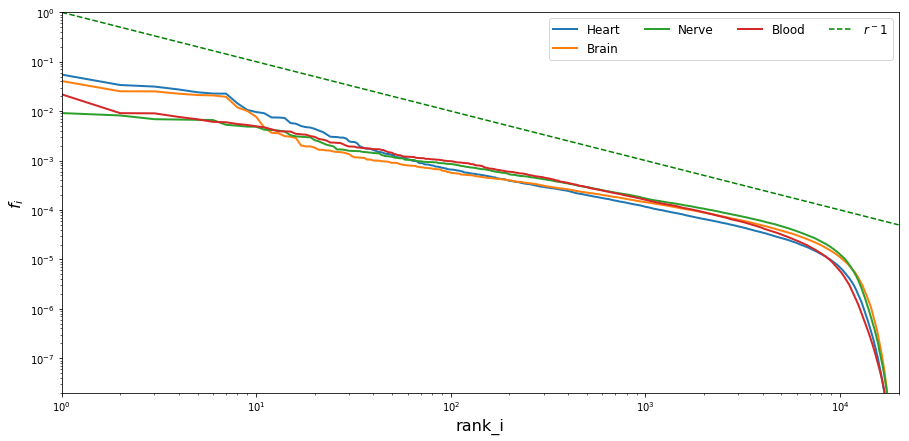

In [43]:
fig = plt.figure(figsize=(15,7))
for tissue in variable_tissues:
    plt.plot(get_zipf_tissue(tissue), lw=2, ls='-', label=tissue)
plt.plot(np.arange(1,2e4), 1./np.arange(1,2e4), 'g--', label='$r^-1$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('rank_i', fontsize=16)
plt.ylabel('$f_i$', fontsize=16)
plt.xlim(1,2e4)
plt.ylim(2e-8,1e0)
plt.legend(ncol=4, fontsize=12)
plt.show()
fig.savefig("Zipf_tissue.pdf")

## Heaps

In [44]:
def get_heaps_tissue(tissue):
    subdf = df.loc[:,samples[samples['secondary_site'].isin(get_specific_mapping_to(tissue))].index.values]
    M = subdf.apply(lambda x: np.sum(x), axis=0).values
    ndw = subdf.apply(lambda x: len(np.nonzero(x)[0]), axis=0).values
    return M, ndw    

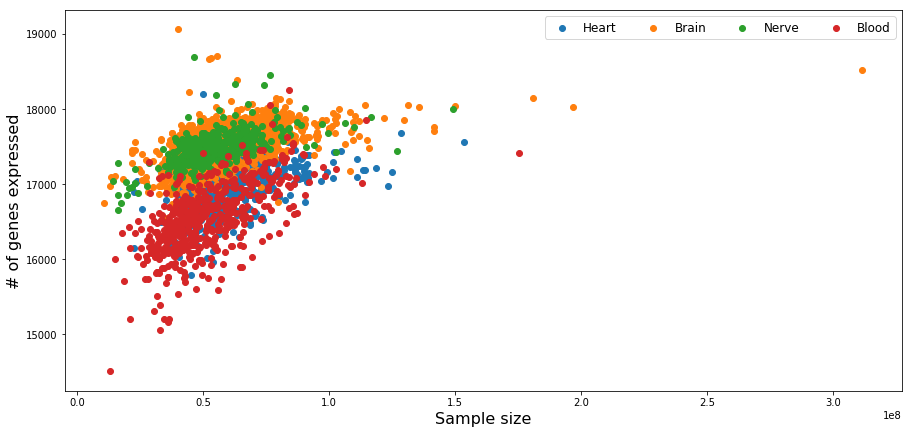

In [45]:
fig = plt.figure(figsize=(15,7))
for tissue in variable_tissues:
    heaps = get_heaps_tissue(tissue)
    plt.scatter(heaps[0], heaps[1],  label=tissue)
plt.xlabel('Sample size', fontsize=16)
plt.ylabel('# of genes expressed', fontsize=16)
plt.legend(ncol=4, fontsize=12)
plt.show()
fig.savefig("Heaps_tissue.pdf")

## global

In [ ]:
fig=plt.figure(figsize=(25,8))
ax = fig.subplots(1,3)
colors = (['darksalmon','lawngreen', 'lightskyblue','pink'],['r','g','b','m'])
variable_tissues = ['Heart','Brain','Nerve', 'Blood']
for i,tissue in enumerate(variable_tissues):
    ax[0].plot(get_integral_tissue(tissue), label=tissue, color=colors[0][i])
    ax[1].plot(get_zipf_tissue(tissue), label=tissue,color=colors[0][i])
    heaps = get_heaps_tissue(tissue)
    ax[2].scatter(heaps[0],heaps[1], label=tissue, c=colors[0][i], alpha=0.2)
    bin_means, bin_edges, _ = binned_statistic(heaps[0], heaps[1], bins = np.linspace(0.2e8,1.5e8))
    #bin_means, bin_edges, _ = binned_statistic(heaps[0], heaps[1], bins = np.linspace(8.6e5,9.8e5,8))
    ax[2].scatter((bin_edges[:-1]+bin_edges[1:])/2., bin_means, marker='x', c=colors[1][i], label='binned[%s]'%tissue)
    
ax[1].plot(np.arange(1,1e4), 1./np.arange(1,1e4), 'g--', label='$r^-1$')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[2].legend(fontsize=16)
ax[0].set_xlabel('Number of genes', fontsize=16)
ax[0].set_ylabel('Fraction of total tissue expression', fontsize=16)
ax[1].set_xlabel('rank_i', fontsize=16)
ax[1].set_ylabel('$f_i$', fontsize=16)
ax[2].set_xlabel('Sample size', fontsize=16)
ax[2].set_ylabel('# of genes expressed', fontsize=16)
ax[2].set_xlim(0.05e8,1.5e8)
ax[1].set_ylim(1e-6,1)
plt.show()
fig.savefig("zipfheaps_tissue.pdf")

# lenght

In [172]:
q_many = pd.read_csv("genes.txt", index_col=[0], header=[0])
q_many = q_many[q_many['type_of_gene']=='protein-coding']
lenghts = q_many['lenght']

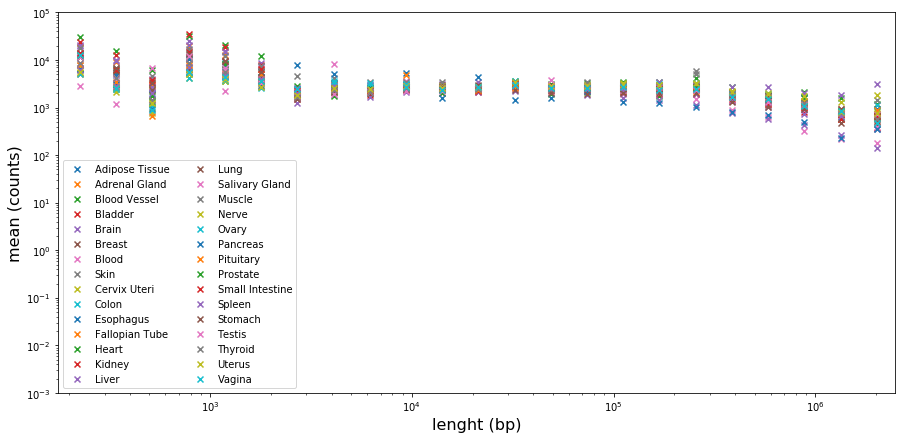

In [173]:
#from scipy.stats import binned_statistic
fig=plt.figure(figsize=(15,7))
bins_for_l = np.logspace(1,8,40)
for tissue in primaries:
    bin_means, bin_edges, _ = binned_statistic(lenghts, df_tissue.loc[:,tissue], statistic='mean', bins=bins_for_l)
    #plt.scatter(lenghts,df_tissue.loc[:,tissue])
    plt.scatter((bin_edges[1:]+bin_edges[:-1])/2,bin_means, marker='x',label=tissue)
    plt.yscale('log')
    plt.xscale('log')
plt.xlabel('lenght (bp)', fontsize=16)
plt.ylabel('mean (counts)', fontsize=16)
plt.xlim((lenghts.min(),lenghts.max()))
plt.ylim((1e-3,1e5))
plt.legend(ncol=2)
plt.show()
fig.savefig("meanLenght_tissue.pdf")

## inter intra

In [66]:
inter_vars = df_tissue.apply(np.var, axis=1).values
inter_means = df_tissue.apply(np.average, axis=1).values

In [70]:
inter_cv2s = [inter_vars[i]/(m*m) if m>0 else 0 for i,m in enumerate(inter_means)]

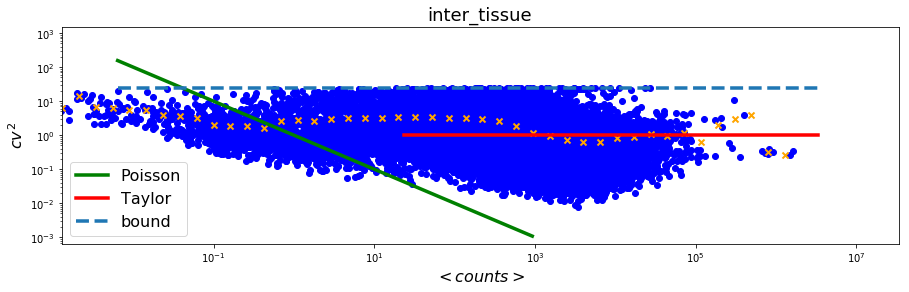

In [72]:
fig=plt.figure(figsize=(15,4))
plt.scatter(inter_means, inter_cv2s, c='b')
plt.plot(x_lin[:30],1./x_lin[:30], 'g-', lw=3.5, label='Poisson')
plt.plot(x_lin[-30:],[1 for _ in x_lin[-30:]], 'r-', lw=3.5, label='Taylor')
plt.plot(x_lin,[len(df_tissue.columns)-1 for _ in x_lin], '--', lw=3.5, label='bound')

bin_means, bin_edges,_=binned_statistic(inter_means, inter_cv2s, statistic='mean', bins=np.logspace(np.log10(np.min(inter_means[inter_means.nonzero()])),np.log10(np.max(inter_means))))

plt.scatter((bin_edges[1:]+bin_edges[:-1])/2, bin_means, marker='x', lw=2, color='orange')

plt.title('inter_tissue',fontsize=18)
plt.xlabel("$<%s>$"%normalisation_str, fontsize=16)
plt.ylabel("$cv^2$", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim(means[means.nonzero()].min()/5,np.power(10,np.log10(means.max())+1))
plt.ylim(variances[variances.nonzero()].min()/10,len(subdf.columns)*10)
plt.legend(fontsize=16)
plt.show()
fig.savefig("cvmean_loglog_inter_tissue.png")

In [75]:
bin_means, bin_edges, binnumber = binned_statistic(inter_means, inter_cv2s, statistic='mean', bins=np.logspace(np.log10(np.min(inter_means[inter_means.nonzero()])),np.log10(np.max(inter_means))))

def get_inter_distance_from_mean(mean, cv2):
    bin_i = 0
    for i,_ in enumerate(bin_edges[:-1]):
        if mean<bin_edges[i+1] and mean > bin_edges[i]:
            bin_i = i
            break
    return(cv2-bin_means[bin_i])

In [119]:
subdf = df.loc[:,samples[samples['primary_site']==tissue].index.values]
intra_means = subdf.apply(np.nanmean, axis=1).values
intra_variance = subdf.apply(np.nanvar, axis=1).values
intra_cv2 = [intra_variance[i]/(np.power(mean,2)) if mean>0 else 0 for i,mean in enumerate(intra_means) ]

bin_means_intra, bin_edges_intra, _ = binned_statistic(intra_means, intra_cv2, statistic='mean', bins=np.logspace(np.log10(np.min(intra_means[intra_means.nonzero()])),np.log10(np.max(intra_means))))

def get_intra_distance_from_mean(mean, cv2):
    bin_i = 0
    for i,_ in enumerate(bin_edges[:-1]):
        if mean<bin_edges_intra[i+1] and mean > bin_edges_intra[i]:
            bin_i = i
            break
    return(cv2-bin_means_intra[bin_i])

In [120]:
inter = []
intra = []
for i,g in enumerate(df_tissue.index.values):
    inter.append(get_inter_distance_from_mean(inter_means[i],inter_cv2s[i]))
    intra.append(get_intra_distance_from_mean(intra_means[i], intra_cv2[i]))
intra=np.array(intra)
inter=np.array(inter)

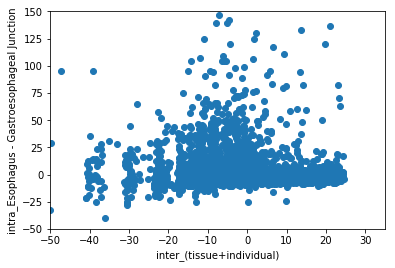

In [135]:
x = np.logspace(np.log10(5e-1),20)
fig = plt.figure()
plt.scatter(inter, intra, label=tissue)
#plt.plot(x,x)
#plt.plot(x,np.sqrt(x))
plt.xlabel('inter_(tissue+individual)')
plt.ylabel('intra_%s'%tissue)
#plt.yscale('log')
#plt.xscale('log')
plt.ylim(-50,150)
plt.xlim(-50,35)
plt.show()
fig.savefig("inter_intra_%s.png"%tissue)

In [136]:
for i, inter_g in enumerate(inter):
    if((np.abs(intra[i])<1) & (inter_g<10 and inter_g>8)):
        print(df.index[i])

ENSG00000109805
ENSG00000126787
ENSG00000188959
ENSG00000183742
ENSG00000179913
ENSG00000131747
ENSG00000141579
ENSG00000047936
ENSG00000181885
ENSG00000134242
ENSG00000137714
ENSG00000066279
ENSG00000206075
ENSG00000158050
ENSG00000156127
ENSG00000030419
ENSG00000123485
ENSG00000166803
ENSG00000111679
ENSG00000120756
ENSG00000171303
ENSG00000137804
ENSG00000010671
ENSG00000141293
ENSG00000237649
ENSG00000105289
ENSG00000197565
ENSG00000175793
ENSG00000158764
ENSG00000085662
ENSG00000169894
ENSG00000079385
ENSG00000114251
ENSG00000174788
ENSG00000102096
ENSG00000196754
ENSG00000248144
ENSG00000122122
ENSG00000237541
ENSG00000070526
